In [11]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


In [12]:
import pandas as pd

df = pd.read_csv('/content/data.csv')
display(df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
# Define features (X) and target (y) from the loaded DataFrame 'df'
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1, errors='ignore') # Drop 'id', 'diagnosis', and 'Unnamed: 32' if it exists
y = df['diagnosis']

print("Dataset Loaded Successfully")
print("Shape of dataset:", X.shape)

# =====================================
# 3. Train-Test Split
# =====================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # Keeps class distribution balanced
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Dataset Loaded Successfully
Shape of dataset: (569, 30)
Training set size: (455, 30)
Testing set size: (114, 30)


In [14]:
# 4. Standardize Features
# =====================================
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed")

# =====================================
# 5. Fit Logistic Regression Model
# =====================================
model = LogisticRegression(max_iter=10000)

model.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully!")

Feature scaling completed
Logistic Regression model trained successfully!


In [15]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

threshold = 0.3
y_pred_custom = (y_proba >= threshold).astype(int)

print("Confusion Matrix (Threshold = 0.3):\n",
      confusion_matrix(y_test_numerical, y_pred_custom))

print("Precision:", precision_score(y_test_numerical, y_pred_custom))
print("Recall:", recall_score(y_test_numerical, y_pred_custom))


Confusion Matrix (Threshold = 0.3):
 [[71  1]
 [ 1 41]]
Precision: 0.9761904761904762
Recall: 0.9761904761904762



Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


AUC Score: 0.9960


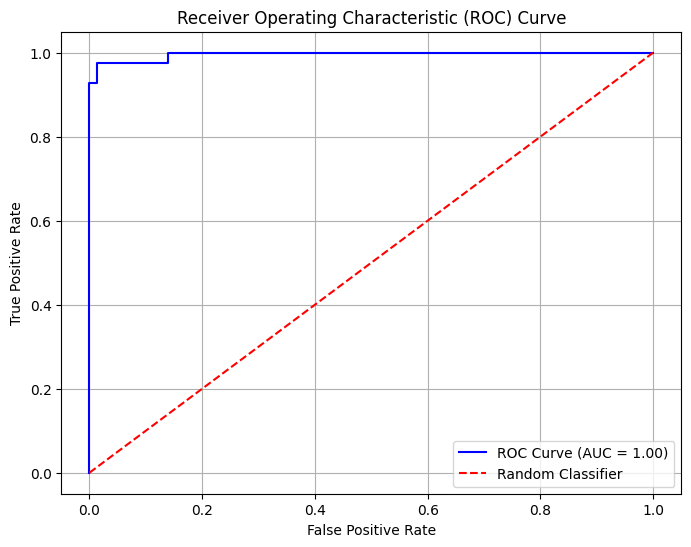

In [16]:
# Evaluate the model

# Generate predictions and probabilities
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1] # Probability of the positive class (M)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Convert y_test to numerical labels for ROC calculation (1 for 'M', 0 for 'B')
y_test_numerical = y_test.apply(lambda x: 1 if x == 'M' else 0)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_numerical, y_proba)
auc_score = roc_auc_score(y_test_numerical, y_proba)

print(f"\nAUC Score: {auc_score:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

### Explanation of the Sigmoid Function

The sigmoid function, also known as the logistic function, is a crucial component in logistic regression. It maps any real-valued number into a value between 0 and 1, but never exactly at those limits. It's defined by the formula:

$$S(x) = \frac{1}{1 + e^{-x}}$$

Where:
- $S(x)$ is the output of the sigmoid function, representing a probability.
- $e$ is Euler's number (approximately 2.71828).
- $x$ is the input to the function, often the linear combination of features and weights in a logistic regression model.

**Why is it used in Logistic Regression?**

In binary classification tasks (like our breast cancer diagnosis), we want to predict the probability that an instance belongs to a certain class (e.g., probability of being 'Malignant'). The linear combination of features $(w_0 + w_1x_1 + ... + w_nx_n)$ can produce any real number, but probabilities must be between 0 and 1. The sigmoid function transforms this linear output into a probability, making it suitable for classification.

**Thresholding:**

Once the sigmoid function outputs a probability, a **threshold** is applied to classify the instance. For example, if the predicted probability $P \ge 0.5$, the instance might be classified as 'Malignant', and if $P < 0.5$, it's classified as 'Benign'. This threshold can be adjusted to optimize the model for specific objectives, such as maximizing recall or precision.

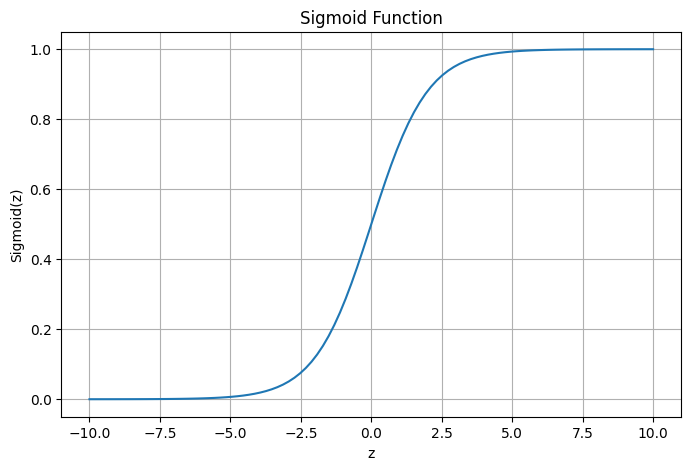


First 5 Manual Sigmoid Probabilities: [3.64568116e-04 9.99999989e-01 4.25679471e-02 5.76187322e-01
 5.09155489e-01]
First 5 Sklearn Probabilities: [3.64568116e-04 9.99999989e-01 4.25679471e-02 5.76187322e-01
 5.09155489e-01]


In [17]:
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(8,5))
plt.plot(z, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid()
plt.show()

z_values = model.decision_function(X_test_scaled)
manual_sigmoid = 1 / (1 + np.exp(-z_values))

print("\nFirst 5 Manual Sigmoid Probabilities:", manual_sigmoid[:5])
print("First 5 Sklearn Probabilities:", y_proba[:5])